In [91]:
import pandas as pd
data = pd.read_csv('.\\Data\\merged.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28500 entries, 0 to 28499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3800 non-null   object
 1   HomeTeam  28500 non-null  object
 2   AwayTeam  28500 non-null  object
 3   FTHG      28500 non-null  int64 
 4   FTAG      28500 non-null  int64 
 5   FTR       28500 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [92]:
data.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,13/08/16,Burnley,Swansea,0,1,A
1,13/08/16,Crystal Palace,West Brom,0,1,A
2,13/08/16,Everton,Tottenham,1,1,D
3,13/08/16,Hull,Leicester,2,1,H
4,13/08/16,Man City,Sunderland,2,1,H
5,13/08/16,Middlesbrough,Stoke,1,1,D
6,13/08/16,Southampton,Watford,1,1,D
7,14/08/16,Arsenal,Liverpool,3,4,A
8,14/08/16,Bournemouth,Man United,1,3,A
9,15/08/16,Chelsea,West Ham,2,1,H


In [93]:
data.describe()

,FTHG,FTAG
count,28500.000000,28500.000000
mean,1.513158,1.230000
std,1.307224,1.209303
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,9.000000


In [94]:
import numpy as np
# Max Goal Match
data.loc[[np.argmax(data.FTAG + data.FTHG)]]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
125,26/11/16,Swansea,Crystal Palace,5,4,H


([<matplotlib.axis.XTick at 0x1e3528cc4f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

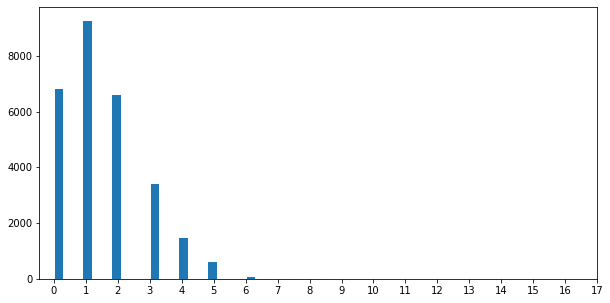

In [95]:
# most_probable home score
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.FTHG,bins=30,edgecolor='white')
plt.xticks(range(18))

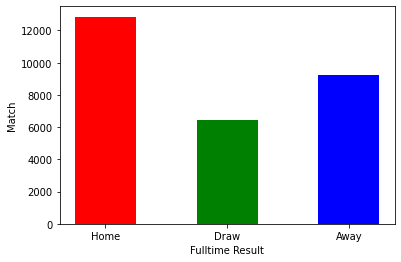

In [96]:
# H_A_D counting
import matplotlib.pyplot as plt
def resultAllMatch():
    countH, countA, countD = 0,0,0
    for index, match in data.iterrows():
        if match.FTR == 'H':
            countH += 1
        elif match.FTR == 'A':
            countA += 1
        else:
            countD += 1
    x = np.arange(3)
    width = 0.5
    plt.bar(x, [countH, countD, countA], width, color=['red', 'green', 'blue'])
    plt.xlabel("Fulltime Result")
    plt.ylabel("Match")
    bars = ("Home", "Draw", "Away")
    plt.xticks(x, bars)
resultAllMatch()

WIN RATE: 76.84%
DRAW RATE: 13.68%
LOSE RATE: 9.47%


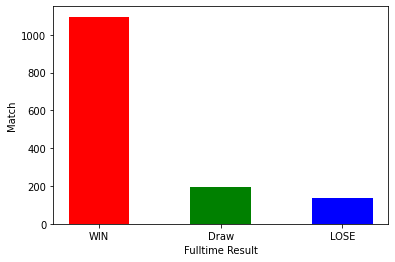

In [97]:

def homePerformance(team):
    countW, countL, countD = 0,0,0
    for index, match in data.iterrows():
        if str(match.HomeTeam) == team:
            if match.FTR == 'H':
                countW += 1
            elif match.FTR == 'A':
                countL += 1
            else:
                countD += 1
    print('WIN RATE: {:.2f}%\nDRAW RATE: {:.2f}%\nLOSE RATE: {:.2f}%'.format(
        100*countW/(countW+countD+countL),
        100*countD/(countW+countD+countL),
        100*countL/(countW+countD+countL))
        )
    x = np.arange(3)
    width = 0.5
    plt.bar(x, [countW, countD, countL], width, color=['red', 'green', 'blue'])
    plt.xlabel("Fulltime Result")
    plt.ylabel("Match")
    bars = ("WIN", "Draw", "LOSE")
    plt.xticks(x, bars)
homePerformance('Man City')

In [98]:
def predictResult(home, away):
    

IndentationError: expected an indented block (Temp/ipykernel_27800/3504297568.py, line 2)